# 앙상블 학습(Ensemble Learning)
- 여러 개의 분류기를 생성하고 예측을 결합하여 보다 정확한 최종 예측을 도출하는 기법
    - 보팅(Voting)
    - 배깅(Bagging)
    - 부스팅(Boosting)

## 부스팅(Boosting)
- 여러 개의 약한 학습기를 순차적으로 학습/예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식

# LightGBM
- 기존 방식이 균형 트리 분할 방식이라면 LightGBM은 리프(leaf) 중심 트리 분할 방식 => 트리의 균형이 맞지 않고 깊어지지만 오류 손실 최소화
- XGBoost보다 빠루며 메모리 사용량도 적음
- 예측 성능은 XGBoost와 별로 차이가 없음
- 적은 데이터 세트(1만건 이하)로 학습할 경우 과적합(overfitting)이 발생하기 쉬움

In [5]:
from lightgbm import LGBMClassifier
import pandas as pd 
import numpy as np 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2)
lgbm = LGBMClassifier(n_estimators=400)
evals = [(X_test, y_test)]
lgbm.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
pred = lgbm.predict(X_test)
pred_prob = lgbm.predict_proba(X_test)[:,1]

[1]	valid_0's binary_logloss: 0.588444
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.525669
[3]	valid_0's binary_logloss: 0.469988
[4]	valid_0's binary_logloss: 0.425251
[5]	valid_0's binary_logloss: 0.387126
[6]	valid_0's binary_logloss: 0.354219
[7]	valid_0's binary_logloss: 0.328934
[8]	valid_0's binary_logloss: 0.307515
[9]	valid_0's binary_logloss: 0.287909
[10]	valid_0's binary_logloss: 0.268717
[11]	valid_0's binary_logloss: 0.25309
[12]	valid_0's binary_logloss: 0.236447
[13]	valid_0's binary_logloss: 0.221767
[14]	valid_0's binary_logloss: 0.209734
[15]	valid_0's binary_logloss: 0.19756
[16]	valid_0's binary_logloss: 0.188753
[17]	valid_0's binary_logloss: 0.180009
[18]	valid_0's binary_logloss: 0.17283
[19]	valid_0's binary_logloss: 0.165375
[20]	valid_0's binary_logloss: 0.158152
[21]	valid_0's binary_logloss: 0.153965
[22]	valid_0's binary_logloss: 0.147964
[23]	valid_0's binary_logloss: 0.142831
[24]	valid_0's binary_logloss:

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_prob=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)

    print(confusion)
    print('accuracy: ', accuracy)
    print('precision: ', precision)
    print('recall:' , recall)
    print('f1: ', f1)
    print('roc_auc: ', roc_auc)

In [7]:
get_clf_eval(y_test, pred, pred_prob)

[[42  2]
 [ 0 70]]
accuracy:  0.9824561403508771
precision:  0.9722222222222222
recall: 1.0
f1:  0.9859154929577464
roc_auc:  0.9772727272727273


### XGBoost 보다 Score도 향상되었다

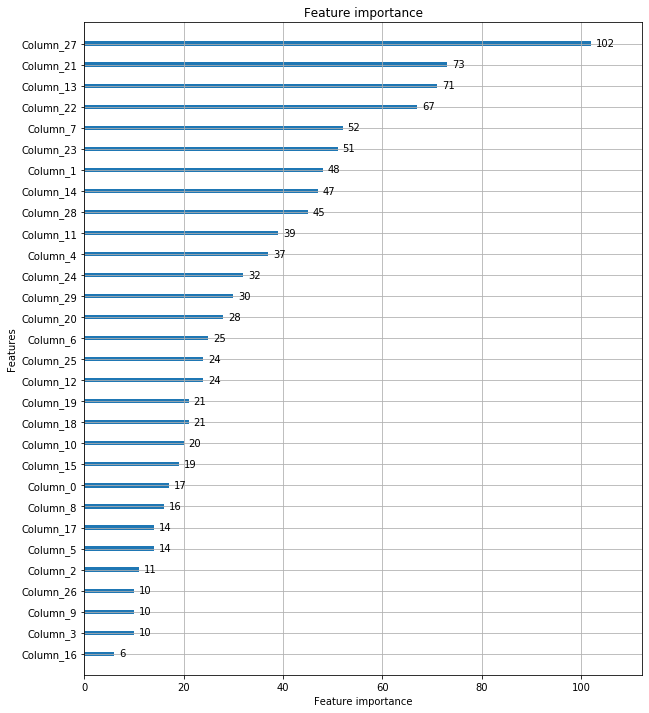

In [9]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm, ax=ax)